<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/FastAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 50.4 MB/s 
     |████████████████████████████████| 189 kB 45.3 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 292 kB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x): return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path),valid_pct=0.2,   seed=42,  label_func=is_cat,item_tfms=Resize(224))

In [ ]:
learn = cnn_learner(dls, resnet34,metrics=error_rate)
learn.fine_tune(1)

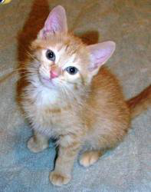

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs=learn.predict(img)
print(f"is this a cat:{is_cat}.")
print(f"probability its a cat:{probs[1].item():.6f}")



is this a cat:True.
probability its a cat:0.543820


In [ ]:
from fastai.vision import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
label_func = lambda o: 
    path/'labels'/f'{o.stem}_P{o.suffix}',
codes = np.loadtxt(path/'codes.txt', dtype=str))
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,error_rate,time
0,0.034564,0.021909,0.008796,01:38


epoch,train_loss,valid_loss,error_rate,time
0,0.016810,0.023983,0.008796,02:15
1,0.024943,0.031680,0.006766,02:15
2,0.038035,0.027463,0.010149,02:14
3,0.025857,0.012844,0.004736,02:15
4,0.013274,0.001596,0.000000,02:15
5,0.005672,0.002721,0.001353,02:15
6,0.003130,0.007534,0.002706,02:14
7,0.003114,0.005619,0.002706,02:14


In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos
1,"xxbos xxmaj wrestlemania 6 , is an entertaining xxmaj wrestlemania , if not an entirely successful one . xxmaj the xxmaj ultimate xxmaj challenge , is of course worth the price of admission alone , but once again as with a lot of the early xxmaj mania 's , there 's too much filler in between . xxmaj the crowd pops for almost everything , and as always , giving us the reliable announcing team of xxunk xxmaj body . xxmaj having a xxmaj face vs xxmaj face match as the main event for a xxmaj wrestlemania , was absolutely unheard of at this time , it only made things that much more tense . \n\n xxmaj matches . \n\n xxmaj koko xxup b. xxmaj ware / w xxmaj frankie xxmaj vs "" the xxmaj model "" xxmaj rick xxmaj martel . xxmaj for a 3 or so minute match",pos,pos
2,"xxbos xxmaj warner xxmaj brothers tampered considerably with xxmaj american history in "" big xxmaj trail "" director xxmaj raoul xxmaj walsh 's first - rate western "" they xxmaj died with xxmaj their xxmaj boots xxmaj on , "" a somewhat inaccurate but wholly exhilarating biography of cavalry officer xxmaj george xxmaj armstrong xxmaj custer . xxmaj the film chronicles xxmaj custer from the moment that he arrives at xxmaj west xxmaj point xxmaj academy until the xxmaj indians massacre him at the xxmaj little xxmaj big xxmaj horn . xxmaj this is one of xxmaj errol xxmaj flynn 's signature roles and one of xxmaj raoul xxmaj walsh 's greatest epics . xxmaj walsh and xxmaj flynn teamed in quite often afterward , and "" they xxmaj died with xxmaj their xxmaj boots xxmaj on "" reunited xxmaj olivia de xxmaj havilland as xxmaj flynn 's romantic interest",pos,pos
3,"xxbos xxmaj watching xxmaj stranger xxmaj than xxmaj fiction director xxmaj marc xxmaj forster 's xxmaj the xxmaj kite xxmaj runner is the cinematic equivalent of eating your vegetables because this art - house epic rated xxup pg-13 is good for your movie - going diet . xxmaj no , this is n't the kind of movie that i like to slouch on the couch and eyeball at the end of a tough day . xxmaj the xxmaj kite xxmaj runner is n't your typical mainstream movie designed to entertain you and make you forget about your troubles . xxmaj first , no celebrity stars appear in it . xxmaj second , nothing is cut and dried , black or white , or so outlandish that you do n't believe an image that you see . xxmaj third , xxmaj the xxmaj kite xxmaj runner lapses into subtitles when the",pos,pos
4,"xxbos "" the xxmaj moon xxmaj is xxmaj blue "" director xxmaj otto xxmaj preminger tackled even more taboo subject matter in his controversial 1955 release "" the xxmaj man with the xxmaj golden xxmaj arm . "" xxmaj whereas he had incensed the xxmaj motion xxmaj picture xxmaj association of xxmaj america with his use of the words "" virgin "" and "" mistress "" in his mild 1953 comedy "" the xxmaj moon xxmaj is xxmaj blue , "" xxmaj preminger went far beyond what any movie had attempted with "" the xxmaj man with the xxmaj golden xxmaj arm "" since xxmaj dick xxmaj powell made his law and order epic "" to the xxmaj ends of the xxmaj xxunk ) about thwarting the international traffic in narcotics . xxmaj based on xxmaj nelson xxmaj algren 's novel that won the 1950 xxmaj national xxmaj book xxmaj",pos,pos

In [ ]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), 
valid = 'test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics= accuracy)
learn.fine_tune(4, 1e-2)



epoch,train_loss,valid_loss,accuracy,time
0,0.469233,0.404385,0.819680,03:28


epoch,train_loss,valid_loss,accuracy,time
0,0.306760,0.281743,0.877360,07:08
1,0.238174,0.217773,0.915560,07:12
2,0.186617,0.188232,0.927600,07:11
3,0.140168,0.196631,0.928440,07:12


In [ ]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([8.2615e-04, 9.9917e-01]))

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/'adult.csv', path =path , y_names = "salary" ,
                                  cat_names= ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race'],
                                  cont_names =['age', 'fnlwgt', 'education-num' ], procs = [Categorify, FillMissing, Normalize]
)
learn = tabular_learner(dls , metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386326,0.365342,0.830467,00:04
1,0.354443,0.353185,0.834613,00:04
2,0.353034,0.352079,0.836456,00:04


In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(28)






epoch,train_loss,valid_loss,time
0,1.503291,1.453013,00:00


epoch,train_loss,valid_loss,time
0,1.367688,1.406766,00:00
1,1.330721,1.337005,00:00
2,1.229908,1.220448,00:00
3,1.104383,1.045477,00:00
4,0.935945,0.857594,00:00
5,0.772890,0.737944,00:00
6,0.688310,0.691689,00:00
7,0.648309,0.676367,00:00
8,0.631781,0.669174,00:00
9,0.614022,0.662122,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,1.0,98.0,1.5,4.090511
1,28.0,95.0,4.0,3.317833
2,89.0,16.0,5.0,4.386167
3,41.0,22.0,4.0,4.054399
4,59.0,8.0,4.0,4.418809
5,95.0,79.0,5.0,3.849186
6,66.0,21.0,4.0,3.507480
7,1.0,3.0,4.0,3.421196
8,14.0,53.0,3.0,3.954413


In [ ]:
from fastbook import *
urls1 = search_images_ddg('white Rhino', max_images=200)
len(urls1), urls1[0] 
download_url(urls1[0], 'images/teddy.jpg')
urls = search_images_ddg('grizzly bear', max_images=100)
len(urls), urls[0]
download_url(urls1[1], 'images/teddy.jpg')
im1 = Image.open('images/teddy.jpg')
im1.thumbnail((256,256))
im1



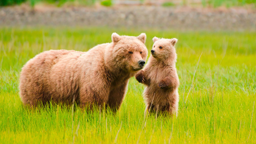

In [ ]:
from fastbook import *
urls = search_images_ddg('bears', max_images=100)
len(urls), urls[0] 
download_url(urls[0], 'images/.teddy.jpg')
urls = search_images_ddg('grizzly bear', max_images = 100)
len(urls), urls[0]
download_url(urls[1], 'images/teddy.jpg')
im = Image.open('images/teddy.jpg')
im.thumbnail((256, 256))
im





In [ ]:
bear_types = 'grizzly','black', 'teddy'
path = Path('bears')
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear',)
    #download_images(dest, url)
    fns = get_image_files(path)  
    fns
    failed = verify_images(fns)
    failed


In [ ]:
from fastbook import *
bear_types = 'grizzly', 'black bear','teddy bear'
path = Path('bears')
if not path.exists():
  path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
#    results = search_images_ddg('bear')
    fns = get_image_files(path)
    fns 
    failed = verify_images(fns)
    failed







In [ ]:
fns = get_image_files(path)
fns 
failed = verify_images(fns)
failed 

(#0) []

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.670211,0.157755,0.033520,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.103675,0.128660,0.033520,00:10
1,0.072716,0.015018,0.005587,00:10
2,0.065435,0.046276,0.027933,00:10
3,0.049581,0.056955,0.027933,00:10
4,0.045338,0.015225,0.011173,00:10
5,0.034929,0.015207,0.011173,00:10
6,0.027902,0.015959,0.011173,00:10


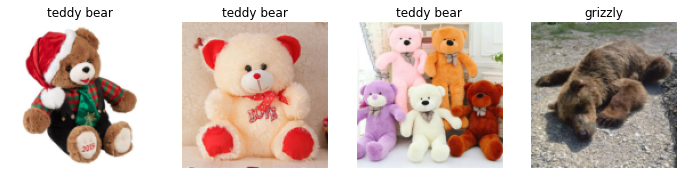

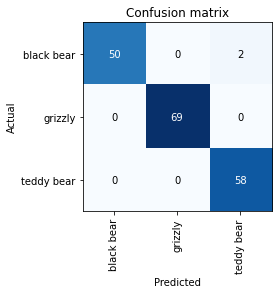

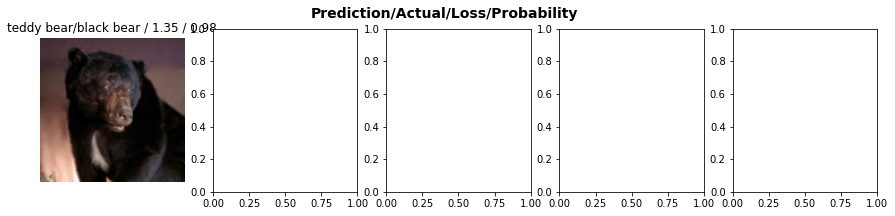

In [ ]:
bears = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)
dls =  bears.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)
bears = bears.new(item_tfms= Resize(128, ResizeMethod.Squish))
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(7)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5,nrows=1)


In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

NameError: ignored

In [ ]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

In [ ]:
for q in ["grizzly", "teddy bear", "black bear"]:
  downloader.download(q, limit=100, output_dir='bears', adult_filter_off=True,force_replace=False, timeout=5)


In [ ]:
for R in ["Lion", "Cheetah", "Tiger"]:
  downloader.download(q, limit=100, output_dir='Feeline', adult_filter_off=True, force_replace=False, timeout=5)

In [ ]:
bears = bears.new(item_tfms = RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1 ,unique=True)
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
bears = bears.new(item_tfms = Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2 , unique=True)



/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.549860,0.198403,0.055556,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.310379,0.141541,0.022222,00:03
1,0.254181,0.131186,0.022222,00:03
2,0.206316,0.165195,0.022222,00:03
3,0.182728,0.166744,0.022222,00:03


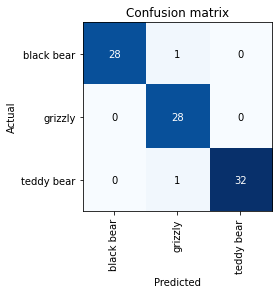

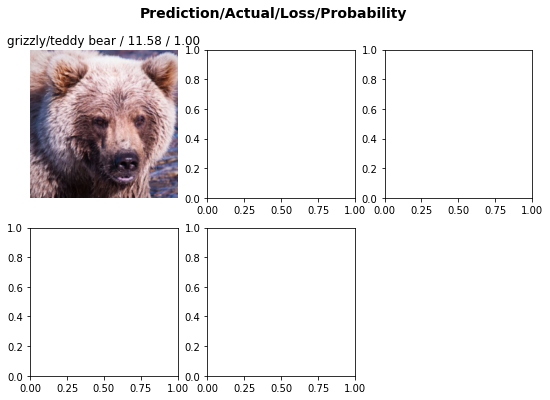

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms = aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5,nrows=2)



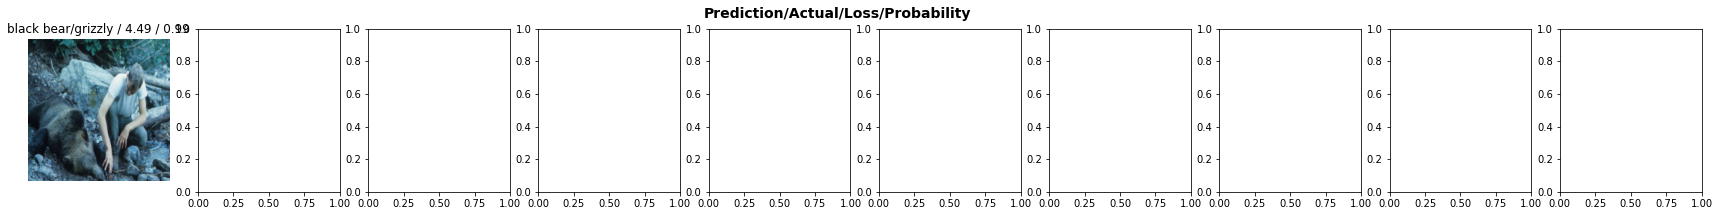

In [ ]:
interp.plot_top_losses(10, nrows=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.980279,0.183112,0.022222,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.300595,0.182667,0.033333,00:05
1,0.196263,0.193909,0.022222,00:05
2,0.152469,0.194757,0.022222,00:05
3,0.115997,0.190530,0.011111,00:05
4,0.092481,0.192157,0.011111,00:05
5,0.080000,0.201681,0.011111,00:05
6,0.073664,0.201492,0.011111,00:05


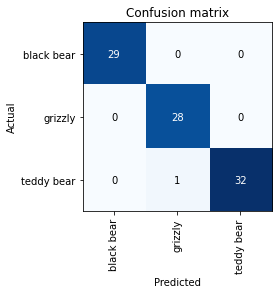

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms = aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls,resnet50, metrics=error_rate)
learn.fine_tune(6)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:

from fastai.vision.widgets import*

cleaner = ImageClassifierCleaner(learn)

In [ ]:
cleaner

In [ ]:
for idx in cleaner.delete():cleaner.fns[idx].unlink()


In [ ]:
!pip install jmd_imagescraper

from jmd_imagescraper.core import * 
from pathlib import Path

In [ ]:
root = Path().cwd()/"bears"

In [ ]:
duckduckgo_search(root, "grizzly", "grizzly bears", max_results=150)
duckduckgo_search(root, "teddy bear", "teddy bears", max_results = 150)
duckduckgo_search(root, "black bear", "black bears", max_results =150)


In [ ]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]))

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learner_inf = load_learner(path/'export.pkl')


In [ ]:
uploader = widgets.FileUpload()
uploader 

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192,192)

In [ ]:
learner_inf.predict(img)

('black bear', TensorBase(0), TensorBase([9.9987e-01, 1.0567e-05, 1.1877e-04]))

In [ ]:
learner_inf.dls.vocab

['black bear', 'grizzly', 'teddy bear']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
out_p1 = widgets.Output()
out_p1.clear_output()
with out_p1: display(img.to_thumb(128,128))
out_p1

Output()

In [ ]:
pred, pred_idx, probs = learn_inf

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE) 

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [ ]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [ ]:
(path/'train'/'3').ls().sorted()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


In [ ]:
image_three = threes[0]

In [ ]:
image_open = Image.open(image_three)

In [ ]:
image_open

In [ ]:
img_seven = sevens[0]
img_open7 = Image.open(img_seven)

In [ ]:
img_open7

In [ ]:
array(img_open7)[0:28, 0:28]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
tensor(img_open7)[4:10][4:10]

tensor([[  0,   0,   0,  21, 161, 250, 250, 252, 250, 250, 250, 252, 250, 250, 250, 252, 250, 250, 250, 252, 250, 100,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  51, 250, 250, 250, 252, 189, 190, 250, 252, 250, 250, 250, 252, 250, 250, 250, 252, 189,  40,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [ ]:
image_three = threes[0]

In [ ]:
im3 = Image.open(image_three)

In [ ]:
im3

In [ ]:
im3_t = tensor(im3)

In [ ]:
df = pd.DataFrame(im3_t[4:15,4:22])

In [ ]:
df.style.set_properties(**{'font- size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0
1,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0
2,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0
3,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0
4,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0
5,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0
6,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0
7,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0
8,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0
9,0,0,0,0,0,0,81,247,254,254,254,254,254,254,146,0,0,0


In [ ]:
seven_tensor = [tensor(Image.open(o)) for o in sevens]

In [ ]:
three_tensor = [tensor(Image.open(o)) for o in threes]

In [ ]:
len(three_tensor), len(seven_tensor)

(6131, 6265)

In [ ]:
show_image = three_tensor[1]

In [ ]:
show_image

In [ ]:
!pip install torchvision

In [ ]:
import torch
import torchvision

In [ ]:

stack_sevens = torch.stack(seven_tensor).float()/255

In [ ]:
stack_threes = torch.stack(three_tensor).float()/255

In [ ]:
stack_sevens.shape

torch.Size([6265, 28, 28])

In [ ]:
stack_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
len(stack_threes.shape)

3

In [ ]:
stack_threes.ndim

3

In [ ]:
mean3 = stack_threes.mean(0)

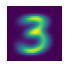

In [ ]:
show_image(mean3)

In [ ]:
mean7 = stack_sevens.mean(0)

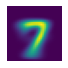

In [ ]:
show_image(mean7)

In [ ]:
a_3 = stack_threes[1]

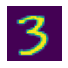

In [ ]:
show_image(a_3)

In [ ]:
dist_3_abs=(a_3 - mean3).abs().mean()
dist_3_sqrt = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqrt


(tensor(0.1114), tensor(0.2021))

In [ ]:
a_7 = stack_sevens[1]

In [ ]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqrt = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqrt

(tensor(0.1304), tensor(0.2585))

In [ ]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3, mean7).sqrt  

(tensor(0.1586), <function Tensor.sqrt>)

In [ ]:
#array 
data = [1,2,3,4]
arry = array(data)
#tensor
data_tensor = [[1,2,3],[4,5,6],[7,8,9]]

tensor_data =  tensor(data_tensor)


In [ ]:
tensor_data[1] 


tensor([4, 5, 6])

In [ ]:
tensor_data[:,1]

tensor([2, 5, 8])

In [ ]:
tensor_data[1,1:3]

tensor([5, 6])

In [ ]:
tensor_data+1

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])

In [ ]:
tensor_data.type()

'torch.LongTensor'

In [ ]:
tensor_data*1.5

tensor([[ 1.5000,  3.0000,  4.5000],
        [ 6.0000,  7.5000,  9.0000],
        [10.5000, 12.0000, 13.5000]])

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o))
for o in(path/'valid'/'3').ls()
])
valid_3_tens = valid_3_tens.float() / 255 
valid_7_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'7').ls() 
]) 
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a -b).abs().mean((-1,-2))


In [ ]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
def mnist_dist2(a,b):return (a - b).abs().mean((-1,-2))

In [ ]:
mnist_dist2(a_3,mean3)

tensor(0.1114)

In [ ]:
mnist_dist2(a_7, mean7)

tensor(0.1304)

In [ ]:
def is_3(x): return mnist_dist2(x, mean3) < mnist_dist2(x,mean7)  

def is_7(x):return mnist_dist2(x, mean7) < mnist_dist2(x,mean3)


In [ ]:
is_7(a_7)

tensor(True)

In [ ]:
is_7(valid_7_tens)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
is_3(a_3)

tensor(True)

In [ ]:
is_3(a_3).float()

tensor(1.)

In [ ]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [ ]:
is_3(valid_7_tens)

tensor([False, False, False,  ..., False, False, False])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()

In [ ]:
accuracy_3s

tensor(0.9168)

In [ ]:
accuracy_7s = is_7(valid_7_tens).float().mean()

In [ ]:
accuracy_7s

tensor(0.9854)

In [ ]:
model_accuracy = (accuracy_3s + accuracy_7s) /2

In [ ]:
model_accuracy

tensor(0.9511)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


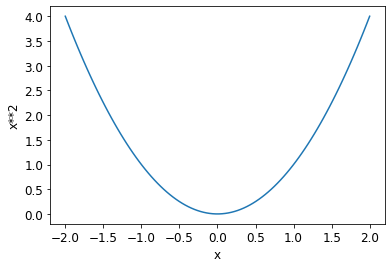

In [ ]:
def f(x):return x**2
plot_function(f, 'x', 'x**2')

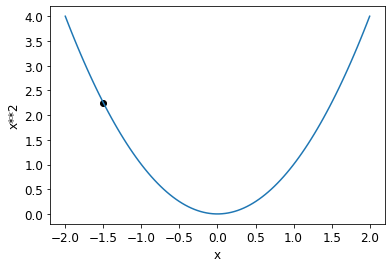

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color = 'Black')

In [ ]:
plt.scatter(-1.5, f(-1.5), color='black')

In [ ]:
xt = tensor(3.).requires_grad_()

In [ ]:
yt = f(xt)

In [ ]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward

<bound method Tensor.backward of tensor(9., grad_fn=<PowBackward0>)>

In [ ]:
def pr_eight(x,w):

In [3]:
def f(x):return x**2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """


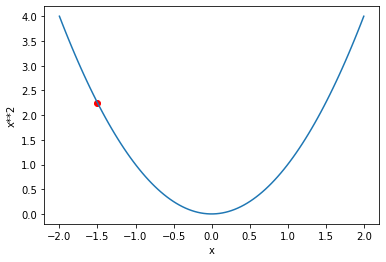

In [6]:
import matplotlib.pyplot as plt


plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='R')

In [8]:
xt = tensor(3.).requires_grad_()

In [9]:
yt = f(xt)

In [10]:
yt.backward()

In [11]:
def f(x): return (x**2).sum()

In [12]:
yt = f(xt)

In [13]:
yt

tensor(9., grad_fn=<SumBackward0>)

In [14]:
yt.backward()

In [16]:
xt.grad

tensor(12.)

In [24]:
xt = tensor([3.,4.,10.]).requires_grad_()

In [25]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [26]:
def f(x): return (x**2).sum()

In [27]:
f(xt)

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
xt.grad()

In [126]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [32]:
time1 = torch.arange(0,20); time1

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [33]:
list = list(range(0,10))

In [34]:
list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [85]:
speed = torch.randn(20) * 3 + 0.75*(time -9.5)**2 + 1 ; speed


tensor([70.8660, 55.4610, 42.0203, 34.2712, 22.6048, 16.0057, 10.4073,  8.1435,  7.1289,  2.2223, -3.0849,  2.3385,  6.3402, 10.0475, 11.8869, 21.9879, 31.4116, 43.9751, 50.8701, 70.2516])

Text(0, 0.5, 'speed')

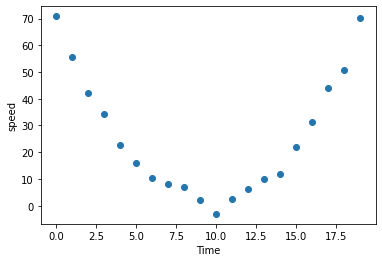

In [88]:
plt.scatter(time, speed);
plt.xlabel('Time')
plt.ylabel('speed')

In [90]:
speed

tensor([70.8660, 55.4610, 42.0203, 34.2712, 22.6048, 16.0057, 10.4073,  8.1435,  7.1289,  2.2223, -3.0849,  2.3385,  6.3402, 10.0475, 11.8869, 21.9879, 31.4116, 43.9751, 50.8701, 70.2516])

In [160]:
def f(t, params):
  a,b,c = params 
  a * (t**2) + (b*t) + c 
  

In [161]:
def mse(pred, targets): return ((preds - targets)**2).mean()


In [95]:
params = torch.randn(3).requires_grad_() 


In [162]:
def f(t, params):
    a,b,c = params
    return a *(t**2)+ (b*t) + c

In [163]:
preds = f(time, params)

In [164]:
def show_pred(f,ax=None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)


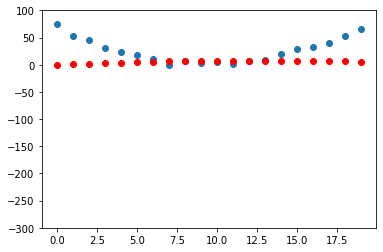

In [165]:
show_pred(preds)

In [166]:
loss = mse(preds, speed)

In [167]:
loss

tensor(996.3967, grad_fn=<MeanBackward0>)

In [168]:
#Time taken by the roller coaster 
time = torch.arange(0,20).float() 

In [169]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [170]:
#Speed
speed = torch.randn(20) * 3 + 0.75*(time-9.5)**2 + 1

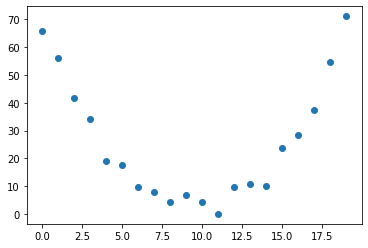

In [171]:
plt.scatter(time, speed)

In [172]:
def f(t, params):
    a,b,c = params 
    return a *(t**2) + (b*t) + c 

In [173]:
def mse(preds, targets): return ((preds-targets)**2).mean()


In [174]:
#The seven step process 
#1 we initialize the parameters 
params = torch.randn(3).requires_grad_()

In [175]:
preds = f(time, params)

In [176]:
preds

tensor([  1.2135,   0.3892,  -0.7476,  -2.1969,  -3.9587,  -6.0331,  -8.4199, -11.1192, -14.1310, -17.4554, -21.0922, -25.0416, -29.3034, -33.8778, -38.7646, -43.9640, -49.4758, -55.3002, -61.4371,
        -67.8864], grad_fn=<AddBackward0>)

In [177]:
def show_pred(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)
    

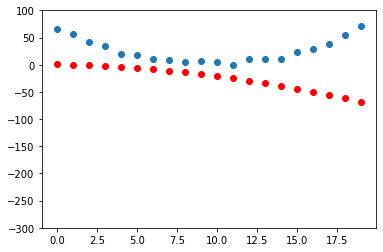

In [178]:
show_pred(preds)

In [179]:
doc(to_np)

In [180]:
loss = mse(preds, speed)

In [181]:
loss

tensor(3618.3071, grad_fn=<MeanBackward0>)

In [182]:
loss.backward()

In [183]:
params.grad * 1e-5

tensor([-0.1844, -0.0119, -0.0010])

In [184]:
params

tensor([-0.1563, -0.6681,  1.2135], requires_grad=True)

In [186]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None 


In [187]:
preds = f(time, params)

In [188]:
mse(preds, speed)

tensor(647.4159, grad_fn=<MeanBackward0>)

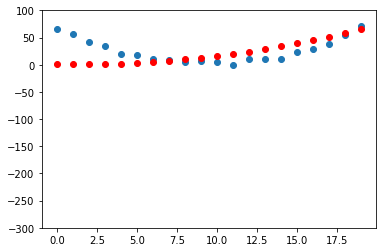

In [189]:
show_pred(preds)

In [ ]:
p